# Pandas para Análise de Séries Temporais

## Lidando com Tempo

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


### Date_range

In [8]:
dti = pd.date_range('2020-01-20', periods=3, freq='2H') # freq determina a frequencia
dti

DatetimeIndex(['2020-01-20 00:00:00', '2020-01-20 02:00:00',
               '2020-01-20 04:00:00'],
              dtype='datetime64[ns]', freq='2H')

#### Outras opções da função date_range: [link](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.date_range.html)

In [9]:
dti = pd.date_range('2020-01-20 16:10', periods=10, freq='D') #Frequência diária
dti

dti2 = pd.date_range('2020-01-20 0810', periods=10, freq='M') #Frequência mensal
dti2

dti3 = pd.date_range('2020-01-20 08pm', periods=5, freq='Y') #Frequência anual (considera o início no último dia do ano)
dti3

DatetimeIndex(['2020-12-31 20:00:00', '2021-12-31 20:00:00',
               '2022-12-31 20:00:00', '2023-12-31 20:00:00',
               '2024-12-31 20:00:00'],
              dtype='datetime64[ns]', freq='A-DEC')

#### Vamos manipular outras opções de date_range

In [10]:
#inserindo data de início e fim
dti = pd.date_range(start = '2020-01-20 16:10', end = '2020-02-20', freq='D')
dti

DatetimeIndex(['2020-01-20 16:10:00', '2020-01-21 16:10:00',
               '2020-01-22 16:10:00', '2020-01-23 16:10:00',
               '2020-01-24 16:10:00', '2020-01-25 16:10:00',
               '2020-01-26 16:10:00', '2020-01-27 16:10:00',
               '2020-01-28 16:10:00', '2020-01-29 16:10:00',
               '2020-01-30 16:10:00', '2020-01-31 16:10:00',
               '2020-02-01 16:10:00', '2020-02-02 16:10:00',
               '2020-02-03 16:10:00', '2020-02-04 16:10:00',
               '2020-02-05 16:10:00', '2020-02-06 16:10:00',
               '2020-02-07 16:10:00', '2020-02-08 16:10:00',
               '2020-02-09 16:10:00', '2020-02-10 16:10:00',
               '2020-02-11 16:10:00', '2020-02-12 16:10:00',
               '2020-02-13 16:10:00', '2020-02-14 16:10:00',
               '2020-02-15 16:10:00', '2020-02-16 16:10:00',
               '2020-02-17 16:10:00', '2020-02-18 16:10:00',
               '2020-02-19 16:10:00'],
              dtype='datetime64[ns]', freq='D'

In [11]:
# quando preencho apenas o parâmetro end, start é definido de modo regressivo
# posso adicionar um valor em freq
dti = pd.date_range(end = '2020-02-20 16:10', periods=10, freq='8H')
dti

DatetimeIndex(['2020-02-17 16:10:00', '2020-02-18 00:10:00',
               '2020-02-18 08:10:00', '2020-02-18 16:10:00',
               '2020-02-19 00:10:00', '2020-02-19 08:10:00',
               '2020-02-19 16:10:00', '2020-02-20 00:10:00',
               '2020-02-20 08:10:00', '2020-02-20 16:10:00'],
              dtype='datetime64[ns]', freq='8H')

### Timestamps e time spans

In [12]:
import datetime
pd.Timestamp(datetime.datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [13]:
pd.Timestamp('2020-02-10 10')

Timestamp('2020-02-10 10:00:00')

In [14]:
t = pd.Timestamp('2020-02-10')
print(t.day)
print(t.quarter)
print(t.month)

10
1
2


In [15]:
p = pd.Period('02/2020')
t = pd.Timestamp('02/15/2020')
p.start_time <= t <= p.end_time

True

In [16]:
p.end_time

Timestamp('2020-02-29 23:59:59.999999999')

### Indexação

In [17]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
ind = pd.Series(range(len(rng)), index = rng)
ind

2016-07-01    0
2016-07-02    1
2016-07-03    2
2016-07-04    3
2016-07-05    4
2016-07-06    5
2016-07-07    6
2016-07-08    7
2016-07-09    8
2016-07-10    9
Freq: D, dtype: int64

In [18]:
#mostra o index associado a cada elemento de minha série
ind.index

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
periods = [pd.Period('2016-01'), pd.Period('2016-02'), pd.Period('2016-03')]
ts = pd.Series(np.random.randn(len(periods)), index = periods)
ts

2016-01   -1.208297
2016-02   -1.076480
2016-03    0.262226
Freq: M, dtype: float64

In [20]:
periods[1].dayofyear

60

In [21]:
periods

[Period('2016-01', 'M'), Period('2016-02', 'M'), Period('2016-03', 'M')]

### Leitura de Dados

In [22]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", 
                    infer_datetime_format = True, header = None,)

In [23]:
data.head(13)

,0,1,2
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008128
3,1950,4,0.555100
4,1950,5,0.071577
5,1950,6,0.538570
6,1950,7,-0.802480
7,1950,8,-0.851010
8,1950,9,0.357970
9,1950,10,-0.378900


#### Há algum parâmetro da função read_fwf que nos ajude a tratar esses dados de forma correta? [documentação](https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.read_fwf.html)

In [24]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", 
                   parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)
data.head(13)

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577
5,1950-06-01,0.538570
6,1950-07-01,-0.802480
7,1950-08-01,-0.851010
8,1950-09-01,0.357970
9,1950-10-01,-0.378900


In [25]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [26]:
dateparse = lambda x,y:pd.datetime.strptime('%s-%s'%(x,y),'%Y-%m')

In [27]:
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
2 s ± 205 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, no date parser
1.89 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = True, date parser provided
1.88 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, date parser provided
1.89 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
df = pd.DataFrame({'Year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
print(df)
pd.to_datetime(df)

   Year  month  day  hour
0  2015      2    4     2
1  2016      3    5     3


0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

## Reamostragem

In [29]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2011-01-01 00:00:00    0.681170
2011-01-01 01:00:00    2.733351
2011-01-01 02:00:00   -1.251530
2011-01-01 03:00:00    1.226443
2011-01-01 04:00:00   -1.525900
                         ...   
2011-01-03 19:00:00    0.304661
2011-01-03 20:00:00    0.497860
2011-01-03 21:00:00   -1.061641
2011-01-03 22:00:00    1.987648
2011-01-03 23:00:00    1.223794
Freq: H, Length: 72, dtype: float64

In [30]:
converted = ts.asfreq('45Min')
converted

2011-01-01 00:00:00    0.681170
2011-01-01 00:45:00         NaN
2011-01-01 01:30:00         NaN
2011-01-01 02:15:00         NaN
2011-01-01 03:00:00    1.226443
                         ...   
2011-01-03 19:30:00         NaN
2011-01-03 20:15:00         NaN
2011-01-03 21:00:00   -1.061641
2011-01-03 21:45:00         NaN
2011-01-03 22:30:00         NaN
Freq: 45T, Length: 95, dtype: float64

#### Olhe a documentação do método asfreq() e veja como podemos resolver o problema de NaN: [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html)

In [32]:
converted = ts.asfreq('45Min', method='pad')
converted

2011-01-01 00:00:00    0.681170
2011-01-01 00:45:00    0.681170
2011-01-01 01:30:00    2.733351
2011-01-01 02:15:00   -1.251530
2011-01-01 03:00:00    1.226443
                         ...   
2011-01-03 19:30:00    0.304661
2011-01-03 20:15:00    0.497860
2011-01-03 21:00:00   -1.061641
2011-01-03 21:45:00   -1.061641
2011-01-03 22:30:00    1.987648
Freq: 45T, Length: 95, dtype: float64

## Janela Móvel

### Shift

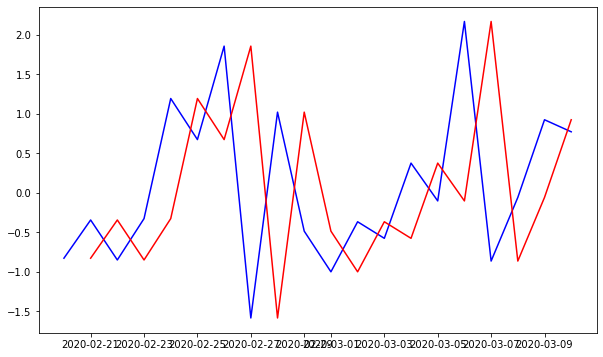

In [46]:
ts = pd.Series(np.random.randn(20),pd.date_range('02/20/2020',freq='D',periods=20))
ts_lagged = ts.shift() #default = 1
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

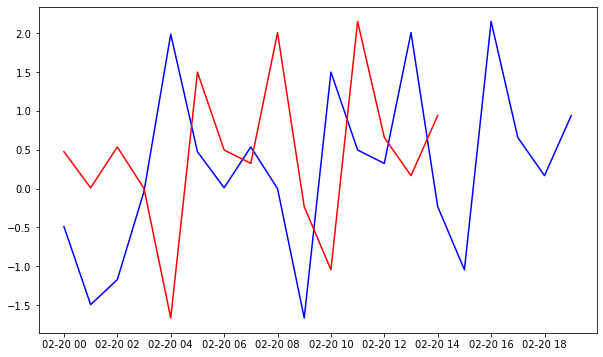

In [45]:
ts = pd.Series(np.random.randn(20),pd.date_range('02/20/2020',freq='H',periods=20))
ts_lagged = ts.shift(-5)
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

### Rolling

                            A         B         C
2020-02-20 00:00:00  0.209031  0.287134 -0.762999
2020-02-20 00:00:01  0.568247 -0.349742  0.811172
2020-02-20 00:00:02  1.643621  0.221073 -1.317150
2020-02-20 00:00:03 -0.176400  0.174555  0.874568
2020-02-20 00:00:04 -1.257697  0.690714  2.359834 

Rolling [window=10,center=False,axis=0] 



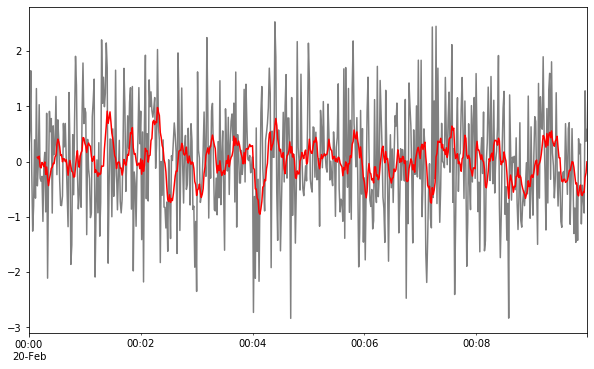

In [47]:
df = pd.DataFrame(np.random.randn(600, 3), 
                  index = pd.date_range('20/2/2020', 
                                        freq = 'S', periods = 600), 
                  columns = ['A', 'B', 'C'])
print(df.head(),'\n')
r = df.rolling(window = 10)
print(r,'\n')
df['A'].plot(color='grey')
r.mean()['A'].plot(color='red')

## Tendência e Sazonalidade

In [49]:
air_passengers = pd.read_csv("./AirPassengers.csv", header = 0, 
                             parse_dates = [0], names = ['Month', 'Passengers'], 
                             index_col = 0)

In [50]:
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


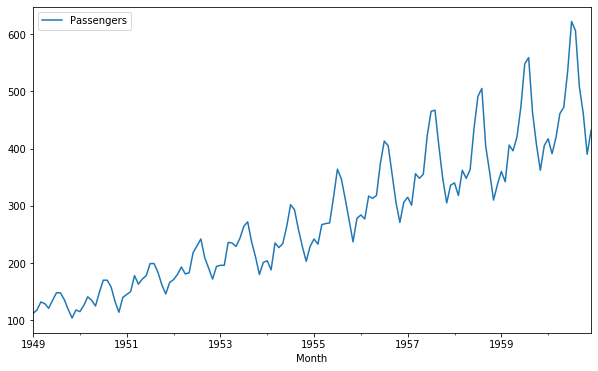

In [51]:
air_passengers.plot()

In [52]:
air_passengers.dtypes

Passengers    int64
dtype: object

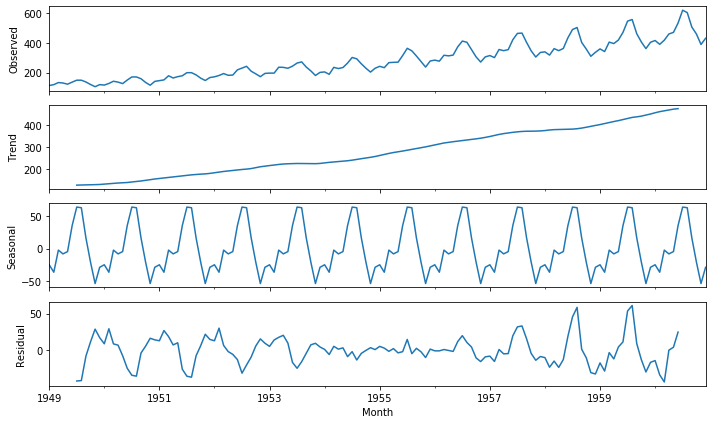

In [64]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(air_passengers,model='addictive')
fig = decomposition.plot()

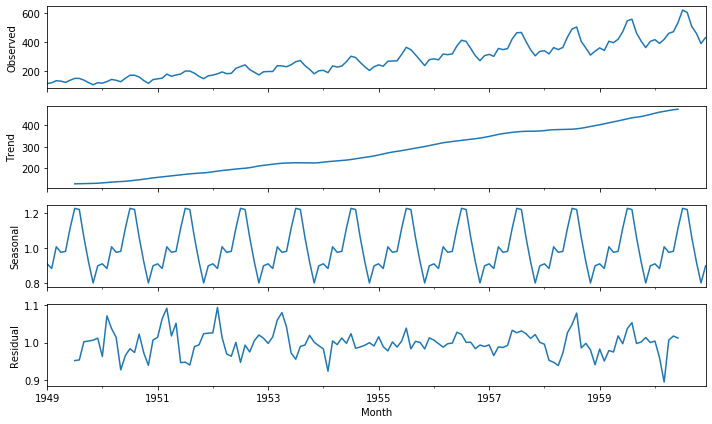

In [65]:
decomposition2 = sm.tsa.seasonal_decompose(air_passengers,model='multiplicative')
fig = decomposition2.plot()